## Student: Lilit Beglaryan


## About data:
 retrieved from : https://www.kaggle.com/competitions/titanic/overview

The data is of some passengers of the well-known Titanic ship. While there was some randomness into who survived and who died in this tragic shipwrech, however it seems that some group of passengers were more likely than others to survive. 

The data contains information about passengers
The main goal is to analyze the relationship between the characteristics of passengers and their survival in teh Titanic's shipwrecking. The goal is to predict on unseen data during the test stage. The description of the variables is given bellow:

 Survival -- 0=No  ,  1=Yes    (Target to be predicted)

* PassengerId -- an assigned identifier to each passenger
* Pclass -- (ticket class) 
1=Upper, 2=Middle, 3=Lower
* Name -- name,last name
* Sex -- male/female
* Age -- age in years
* Sibsp -- # of parents / children aboard the Titanic
* Parch -- 	# of parents / children aboard the Titanic

* Ticket -- Ticket number
* Fare	-- Passenger fare
* Cabin	-- Cabin number	

* Embarked -- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


In [30]:
pip install scikit_posthocs

Note: you may need to restart the kernel to use updated packages.


In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import scikit_posthocs as sp
from scipy import stats
pd.options.display.float_format = '{:,.4f}'.format

In [32]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")



In [69]:
train.shape

(712, 11)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
train.dropna(subset = ["Age"], inplace = True)

In [110]:
print(train.Cabin.isna().sum()) #too many NaN values, so drop
train.drop(columns="Cabin",inplace=True)


AttributeError: 'DataFrame' object has no attribute 'Cabin'

In [72]:
train.describe(include="all") # the majority of passengers(453)is male,
# most people(554 passengers) embarked from S=Southampton
# 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,712.0000,712.0000,712.0000,712,712,712.0000,712.0000,712.0000,712,712.0000,712
unique,NaN,NaN,NaN,712,2,NaN,NaN,NaN,541,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,453,NaN,NaN,NaN,7,NaN,554
mean,448.5899,0.4045,2.2402,NaN,NaN,29.6421,0.5140,0.4326,NaN,34.5673,NaN
std,258.6832,0.4911,0.8369,NaN,NaN,14.4929,0.9307,0.8542,NaN,52.9386,NaN
min,1.0000,0.0000,1.0000,NaN,NaN,0.4200,0.0000,0.0000,NaN,0.0000,NaN
25%,222.7500,0.0000,1.0000,NaN,NaN,20.0000,0.0000,0.0000,NaN,8.0500,NaN
50%,445.0000,0.0000,2.0000,NaN,NaN,28.0000,0.0000,0.0000,NaN,15.6458,NaN
75%,677.2500,1.0000,3.0000,NaN,NaN,38.0000,1.0000,1.0000,NaN,33.0000,NaN


In [73]:
train.dropna(axis=0, subset="Embarked", inplace=True) #drop the 2rows where leaving port(Embarked) is missing
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [74]:
y = train[['PassengerId','Survived']].copy()

X = train.drop(train.columns[1],axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state=104, test_size=0.25, shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.head())

(534, 10)
(178, 10)
(178, 2)
     PassengerId  Survived
421          422         0
78            79         1
860          861         0
607          608         1
804          805         1


In [10]:
 #############################################################

In [75]:
#apply the same process for the data that we need to predict on
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [39]:
test.drop(columns="Cabin",inplace=True) #as the majority of Cabin is missing

In [40]:
# the Ages can be filled with the mean, as the test won't be split into parts
# it is ok to calculate the mean for the whole data
test["Fare"].fillna(test["Fare"].mean(), inplace = True)
test["Age"].fillna(test["Age"].mean(), inplace = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [79]:
train.shape

def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject H0 =>> The data is not normally distributed")
    else:
        print("Fail to reject H0 =>> The data is normally distributed") # we can't be sure in this but we can't reject H1 as well

p value:0.0000
Reject H0 =>> The data is not normally distributed
p value:1.0000
Fail to reject H0 =>> The data is normally distributed
p value:0.0000
Reject H0 =>> The data is not normally distributed


C:\Users\blilit\Anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: xlabel='Fare', ylabel='Count'>

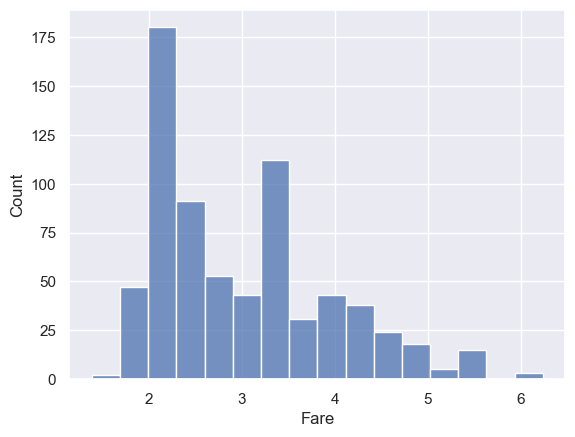

In [64]:
check_normality(train["Age"].to_numpy()) 
check_normality(np.log(train["Fare"]).to_numpy()) #however log transf. is normal
check_normality(train["SibSp"].to_numpy())

sns.histplot(data= train, x=np.log(train["Fare"]))


In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [65]:
train.agg(  # aggreagte these 2 cols and compute summary
    {
        "Age": ["min", "max", "median", "skew"],   # skew=0.4, meaning is positively(right skewed) and is fairly symmetric
        "Fare": ["min", "max", "median", "mean"],
    }
)

,Age,Fare
min,0.4200,0.0000
max,80.0000,512.3292
median,28.0000,15.6458
skew,0.3889,NaN
mean,NaN,34.5673


In [67]:
train[["Sex", "Age"]].groupby("Sex").mean() # male passengers were in average older than females

,Age
Sex,
female,27.7452
male,30.7266


In [68]:
train.groupby("Sex").mean(numeric_only=True)  # among females in our train df the survived ones were more than males, females had
# more siblings and parents on the board in average, and paid more for the tickets than males

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,440.1544,0.7529,2.0734,27.7452,0.6448,0.7143,47.3324
male,453.4128,0.2053,2.3355,30.7266,0.4393,0.2715,27.2688


In [81]:
train.groupby(["Sex", "Pclass"])["Fare"].mean() # in average the 1st class is costlier than the rest
# and females spent far more on class 1 than males

Sex     Pclass
female  1        108.6197
        2         21.9511
        3         15.8754
male    1         71.1428
        2         21.1131
        3         12.1627
Name: Fare, dtype: float64

In [83]:
train["Embarked"].value_counts()  # the majority was from S

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [87]:
train.groupby(["Pclass","Survived"])["Survived"].value_counts() # more survived people in class 1, in other the majority died

Pclass  Survived  Survived
1       0         0            64
        1         1           120
2       0         0            90
        1         1            83
3       0         0           270
        1         1            85
Name: Survived, dtype: int64

In [88]:
train["Pclass"].value_counts() # more people in class 1

3    355
1    184
2    173
Name: Pclass, dtype: int64

In [106]:
train.groupby(["Ticket"])["Fare"].mean().sort_values(ascending=False) # split the data per age and calculate the mean money spent on the tickets
# in average the fare of PC 17755 was higher than for the rest of the ticket types

Ticket
PC 17755   512.3292
19950      263.0000
PC 17608   262.3750
PC 17558   247.5208
PC 17757   227.5250
             ...   
2648         4.0125
112059       0.0000
LINE         0.0000
112050       0.0000
19972        0.0000
Name: Fare, Length: 541, dtype: float64

In [107]:
train["Age"].unique()

array([22.  , 38.  , 26.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,  4.  ,
       58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [109]:
def check_variance_homogeneity(col1, col2):
    test_stat_var, p_value_var= stats.levene(col1,col2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

[Text(0.5, 1.0, 'First class ticket prices split by gender'),
 Text(0, 0.5, '#of Passengers')]

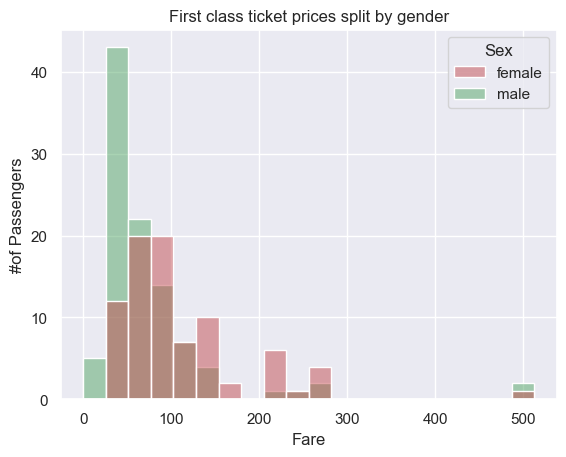

In [140]:
fare_for_rich = train[(train.Pclass == 1)][["Fare","Sex","Survived"]]

sns.histplot(data = fare_for_rich,x="Fare",hue ="Sex", palette={"female":"r","male":"g"} ).set(title = "First class ticket prices split by gender",ylabel="#of Passengers")

# so the costiest fares came mainly from females in the high class.

[Text(0.5, 1.0, 'First class ticket prices split by gender'),
 Text(0, 0.5, '#of Passengers')]

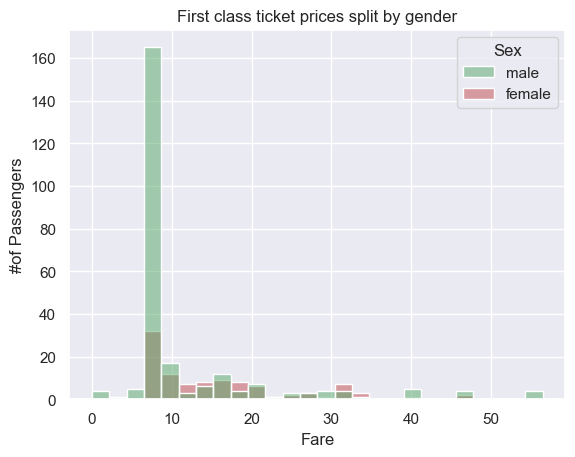

In [139]:
fare_for_poor = train[(train.Pclass == 3)][["Fare","Sex","Survived"]]

sns.histplot(data = fare_for_poor,x="Fare",hue ="Sex", palette={"female":"r","male":"g"} ).set(title = "First class ticket prices split by gender",ylabel="#of Passengers")

# so the majority in 3rd class were men, and the cheapest and the expensive tickets from the 3rd class were of men.


# from these 2 plots=> maybe women on the board were of an aristocrating origin and high rank women

[Text(0.5, 1.0, 'Rate of being survived for PClass 1 vs 3')]

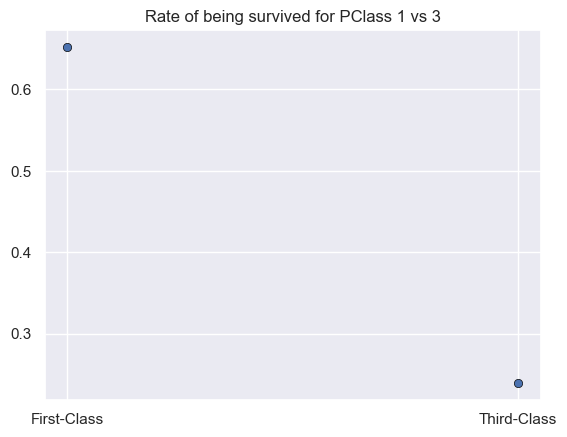

In [155]:
# now my hypothesis is that rich people(in class1) had higher chances to survive than people in class 3.

x = ["First-Class", "Third-Class"]
y = [np.mean(fare_for_rich["Survived"]), np.mean(fare_for_poor["Survived"])]
ax = sns.scatterplot(data = y, edgecolor="black")
ax.set_xticks(range(len(y))) 
ax.set_xticklabels(x)
ax.set(title="Rate of being survived for PClass 1 vs 3")
# we see that the avg surv rate is higher for 1st class passengers than 3rd one's.
# but to statistically test this hypothesis H0: “First-class people didn't have a higher survival rate than third-class people(i.e. their financial situation does not impact the survival”
#H1= not H0(i.e, rich people had more surv rate)

In [160]:
check_normality(fare_for_rich["Survived"]) #not normal, that is why sample a lot

p value:0.0000
Reject H0 =>> The data is not normally distributed


In [161]:
Samp1 = np.array([np.mean(fare_for_rich.sample(20)["Survived"].values) for i in range(80)]) # randomly calculate means from a small sample for 80 times
Samp2 = np.array([np.mean(fare_for_poor.sample(20)["Survived"].values) for i in range(80)])

C:\Users\blilit\AppData\Local\Temp\ipykernel_36720\44459999.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Samp1) # looks like normal
C:\Users\blilit\AppData\Local\Temp\ipykernel_36720\44459999.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Samp2)


<AxesSubplot: ylabel='Density'>

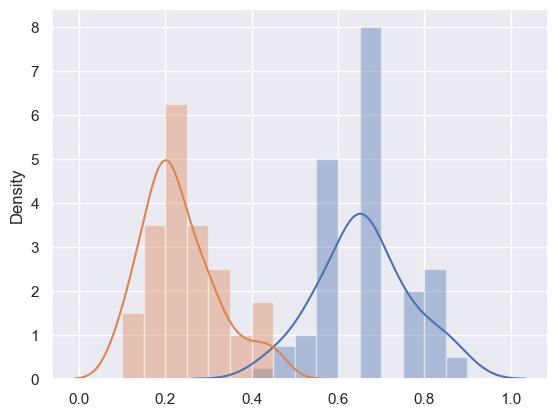

In [164]:
sns.distplot(Samp1) # look like normal, so now we will test our hypothesis in 95% CI, on these sample means usinmg z score
sns.distplot(Samp2)  #we see that the means are very far frome ach other, 0.7 and .2

In [171]:
import scipy.stats as st

effect = np.mean(Samp1) - np.mean(Samp2)
sigma_first = np.std(Samp1)
sigma_third = np.std(Samp2)
sigma_difference = np.sqrt((sigma_first**2)/len(Samp1)  +  (sigma_third**2)/len(Samp2))
z_score = effect / sigma_difference  # the z score is 
p_val = st.norm.sf(abs(z_score))*2
print(p_val<0.5) # p is smaller than 0.5 so reject H0, which means we can not yet prove but at least cannot disprove that the 
#financial status(in terms of fare prices and class) has no impact on survival rate.

True


In [ ]:









#  the rest is from PART #2

[Text(0.5, 1.0, "Passengers' Ages w.r.t their Gender")]

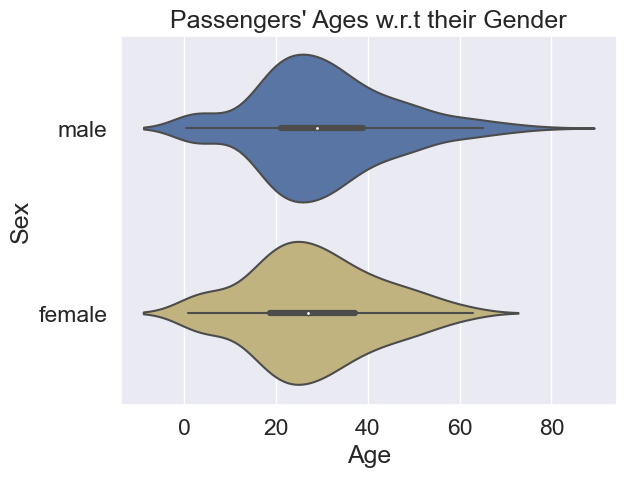

In [20]:
# sns.set_theme()
# sns.set_style("whitegrid")

sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(font_scale=1.5)
sns.violinplot(data=X_train, x= 'Age',y='Sex', palette={"male": "b", "female": "y"}, orient="h").set(title="Passengers' Ages w.r.t their Gender")

# the median of females is younger than the males'
#males are right-skewed in terms of their age, i.e. there are more old males than females on the ship
#the IQR of females is a bit larger than for males(the spread of age is more for females)
#for both the age is mostly concentrated between ~~ [20,40]
#the variance of male ages is higher than for females

##


In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


[Text(0.5, 1.0, "Passengers' Ages w.r.t their Gender")]

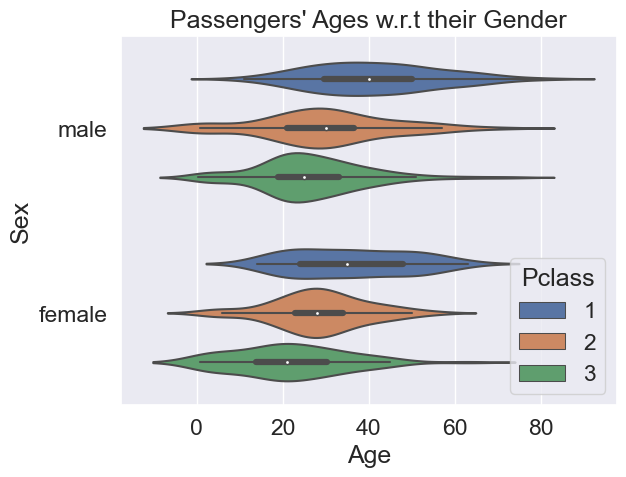

In [21]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(font_scale=1.5)
sns.violinplot(data=X_train, x= 'Age',y='Sex', hue="Pclass", orient="h").set(title="Passengers' Ages w.r.t their Gender")

# there are more [20,40]  aged women per Pclass(the wider middle part) than males
#the medians per Pclass are higher for men than women
#the range of age is higher for men than women for Pclass 1 and 2
#

In [22]:
a = X_train.groupby(["Pclass"])["Embarked"].agg(pd.Series.mode).to_frame() #the majority was from port S regardless of the Pclasses
print(a.shape)
print(a)

print("\n")
a = train.groupby(["Sex"])["Survived"].agg(pd.Series.mode).to_frame() #the majority of women was survived
# while the majority of men in our train data died
print(a.shape)
print(a)

print("\n")

a = X_train.groupby(["Ticket"])["Ticket"].count().head() #some types of tickets happen more than once
print(a.shape)
print(a)

(3, 1)
       Embarked
Pclass         
1             S
2             S
3             S


(2, 1)
        Survived
Sex             
female         1
male           0


(5,)
Ticket
110152    2
110413    3
110564    1
110813    1
111320    1
Name: Ticket, dtype: int64


-0.08244586804341386


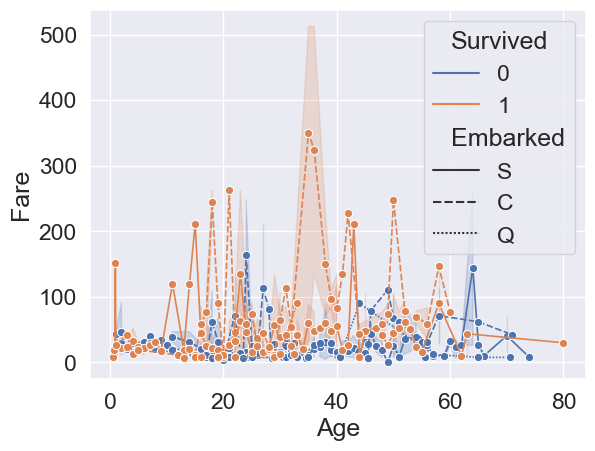

In [23]:
kwargs = dict (linestyle='-.', color='b', marker ='o', linewidth=1.2)
sns.lineplot(data=train,x="Age",y="Fare",hue="Survived",style="Embarked",**kwargs) #the survived have spent more on tickets
#with high confidence level of 0.95, the middle aged people paid more.

print(np.corrcoef(train["Age"],train["Survived"])[0,1]) #-0.08244586804341386 , almost no correlation between surving or not
#and of what age they were

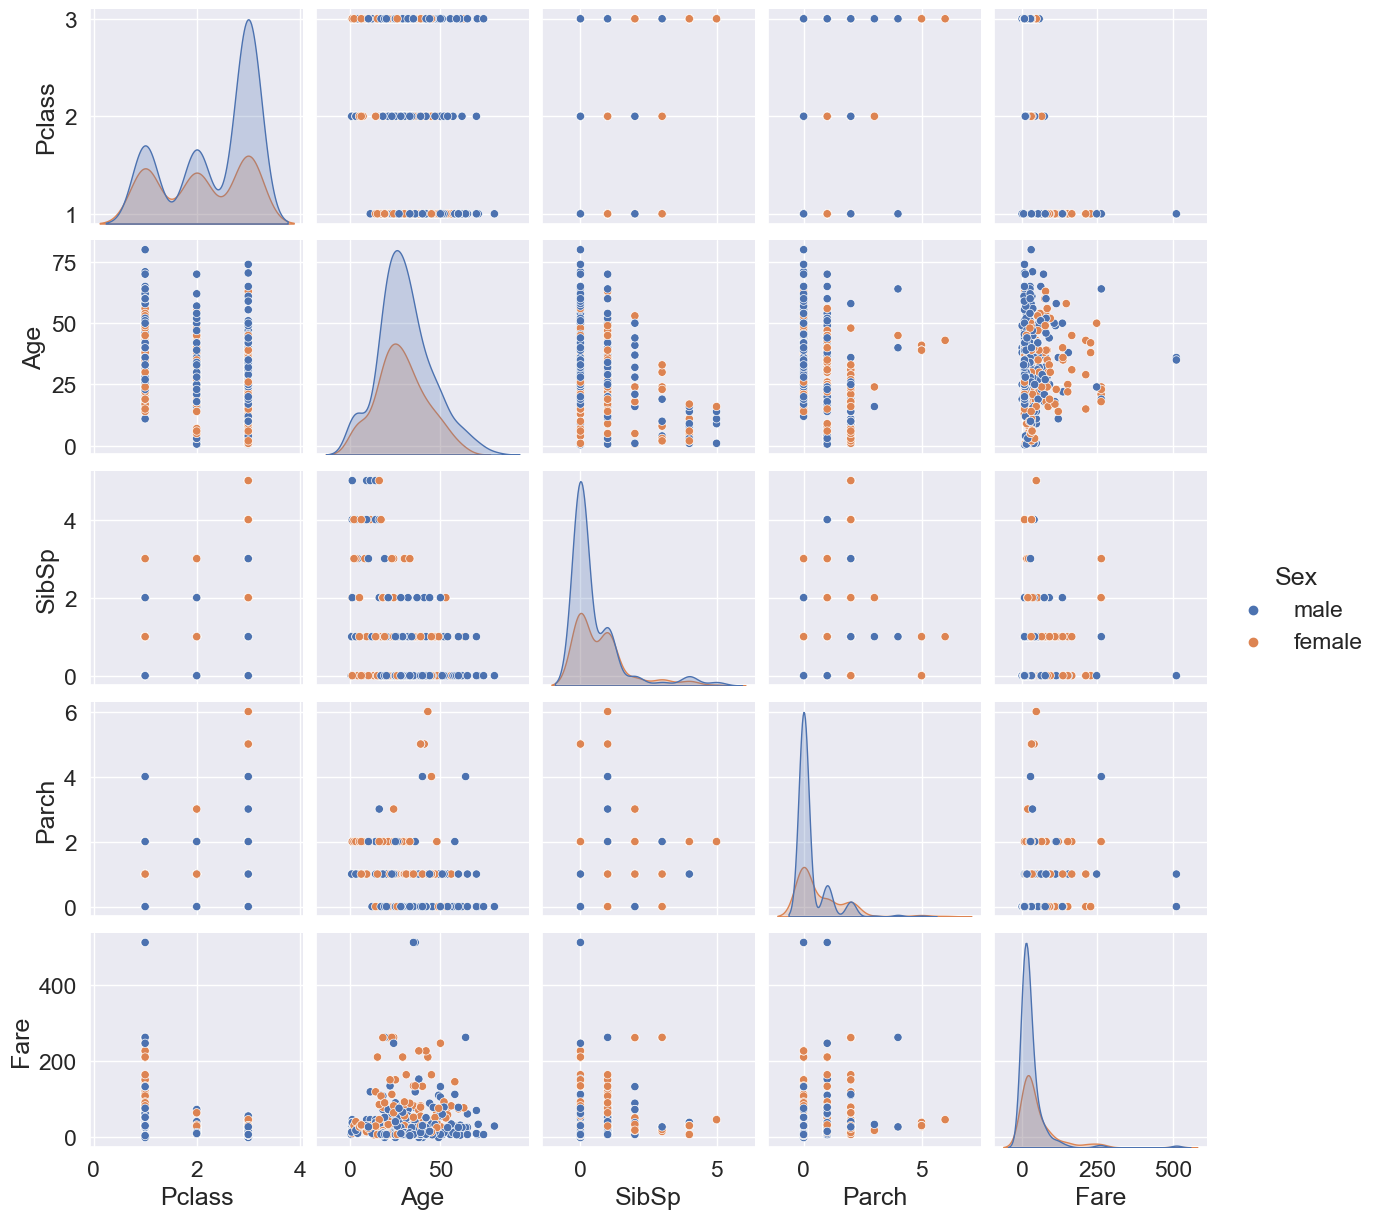

In [24]:
sns.pairplot(data=X_train.iloc[:,1:],hue="Sex")
#AS WE see more blue pints=>more males
# as the parch and sibsp increases(#of parents and siblings on the vacation), the fare decreases
# (probably the family had to pay much so they prefered cheap tickets)
# as the #of siblings and parents increases their ages decrease ????? don't understand how to interpret

# the less siblings you have with you, the older you are, the more siblings with you the younger you are(Age is for you or your siblings???)

plt.show()

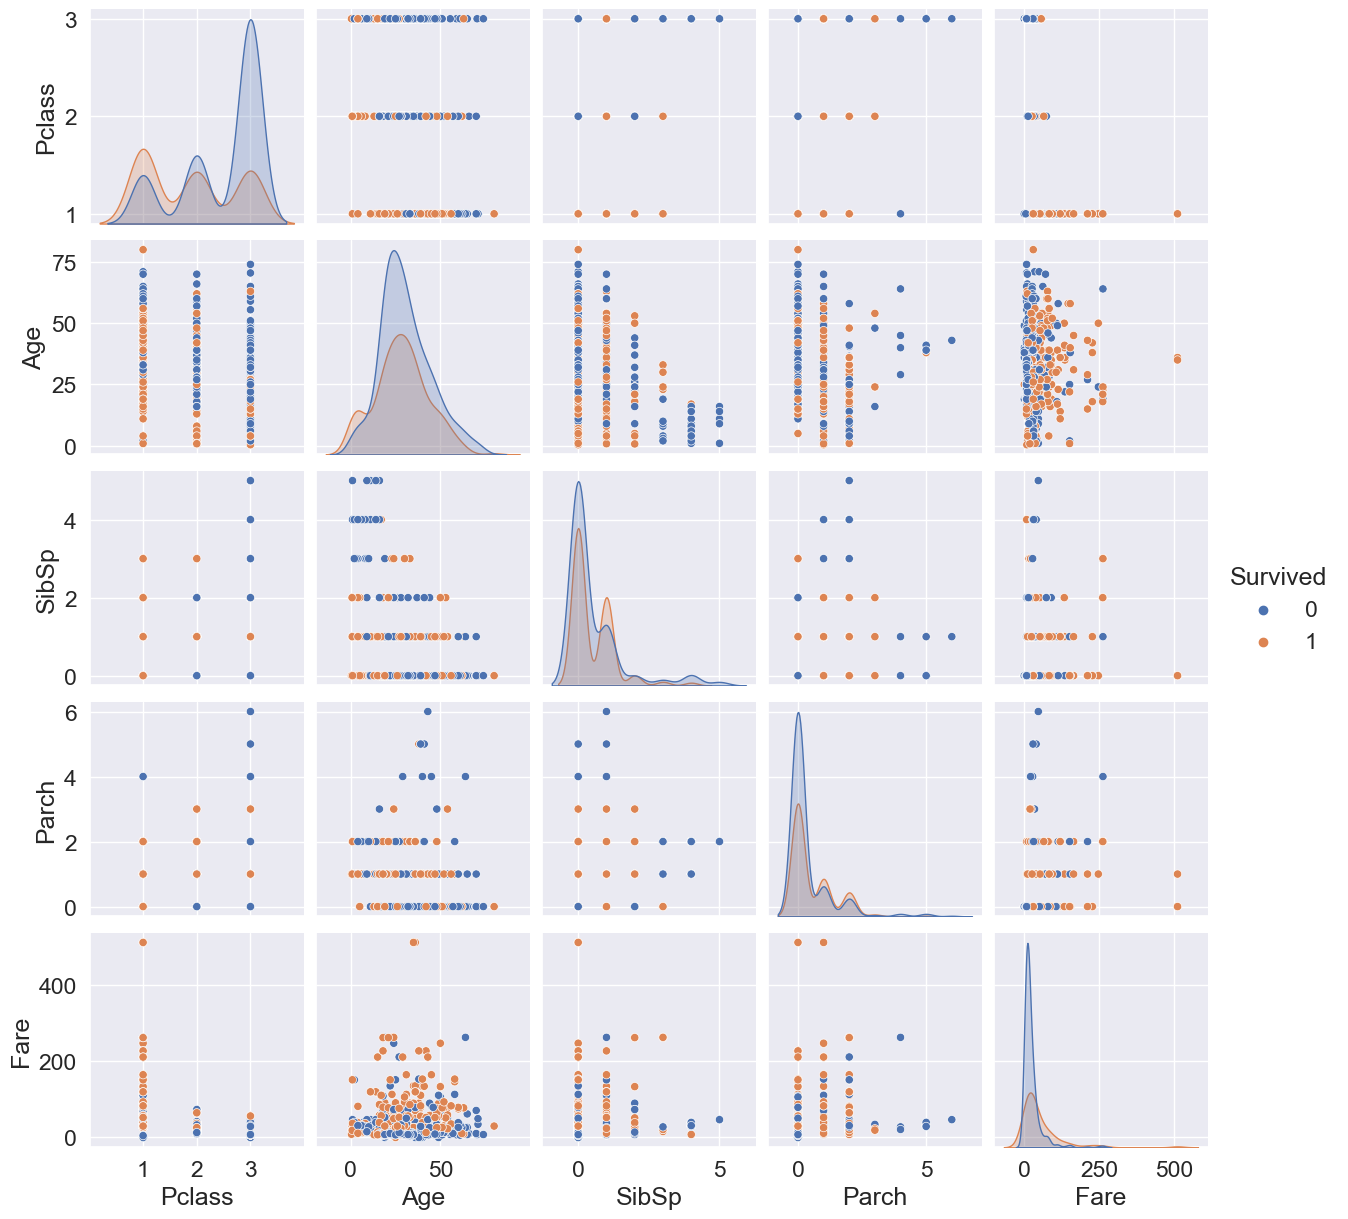

In [25]:
sns.pairplot(data=train.iloc[:,1:],hue="Survived") 
plt.show()

#the less siblings and parents(Parch-Sibsp , diagonal pdfs) were taken , the more the chances a person was not survived(probably did not get help from relatives)
#more survived in Pclass 1
#the higher the tocket fare goes, the younger teh passenger gets, since old people do not like spending much on journeys
#pclass 1 has higher fares not surprisingly and higher survival rate(rich people always benefit)

In [24]:
from pandas.core.reshape.merge import merge
# X_train.merge(y_train, how = 'inner', on = "PassengerId")
y_train = pd.merge(X_train, y_train, how='inner',on="PassengerId")

In [25]:
y_train # don't know why the merge didnot affect the y_train  ???

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,422,3,"Charters, Mr. David",male,21.00,0,0,A/5. 13032,7.7333,Q,0
1,79,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S,1
2,861,3,"Hansen, Mr. Claus Peter",male,41.00,2,0,350026,14.1083,S,0
3,608,1,"Daniel, Mr. Robert Williams",male,27.00,0,0,113804,30.5000,S,1
4,805,3,"Hedman, Mr. Oskar Arvid",male,27.00,0,0,347089,6.9750,S,1
...,...,...,...,...,...,...,...,...,...,...,...
529,210,1,"Blank, Mr. Henry",male,40.00,0,0,112277,31.0000,C,1
530,820,3,"Skoog, Master. Karl Thorsten",male,10.00,3,2,347088,27.9000,S,0
531,316,3,"Nilsson, Miss. Helmina Josefina",female,26.00,0,0,347470,7.8542,S,1
532,884,2,"Banfield, Mr. Frederick James",male,28.00,0,0,C.A./SOTON 34068,10.5000,S,0


<AxesSubplot: >

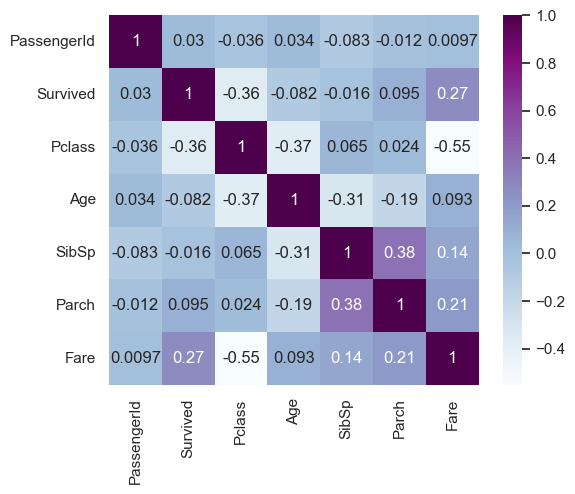

In [27]:
sns.set(font_scale=1)
cor=train.select_dtypes(include=np.number).corr()
sns.heatmap(data=cor,square=True,cmap="BuPu",annot=True)  #almost all the vars have very low(near to 0 cor)
# Parch is positively cor-ed with the SibSp since the more parents a person takes to the trip, the more siblings and familiy members they get

#Survived is lightly related positively with teh Fare, maybe the more expensive a ticket was, the better equipped cabin was for that person
# and more equipped for emergency scenarios